# TensorFlow and Keras for Regression

## Introduction
In the previous lessons you learned about the structure of neural networks, specifically densely connected feed-forward neural networks, or multi-layer perceptrons (MLPs).  You learned about how information is propagated forward through the network from input to predictions.  You also learned about how a model calculates it's own errors using a loss function, determines the gradient of the loss, and uses that to propagate changes in the network weights backward from end to beginning.  This full forward and backward propagation cycle is called an epoch.  Over many epochs a model gradually reduces its loss and converges toward a better configuration of weights to make better predictions.

In this lesson, you will learn about TensorFlow and Keras, two related tools to automate this process and make it more code and computationally efficient.  These tools will make deep learning model development much simpler and faster so you can get powerful models tuned to your data quickly and with fewer opportunities for error.  

### Lesson Outline:
1. Introduction to TensorFlow and Keras
2. Regression vs. Classification in deep learning
3. Preparing data for deep learning
4. Creating your model architecture, including layers, nodes, activation functions, and loss functions.
5. Training your model and visualizing the training history
6. Evaluating your Keras model.

### TensorFlow

TensorFlow is a robust and multifaceted framework specifically designed for deep learning. TensorFlow empowers us to construct and optimize large-scale, intricate models with astonishing efficiency.  The cornerstone of TensorFlow's architecture lies in tensors, multi-dimensional arrays capable of representing data of diverse shapes and sizes. These dynamic entities flow through the neural network, undergoing transformations at each layer, forming the lifeblood of the computational process. TensorFlow grants us the freedom to design complex, branched graph structures, paving the way for a vast array of network architectures.

### Keras: Deep Learning Simplified

Yet, this power comes at a cost – navigating the intricacies of TensorFlow directly can be daunting. Keras offers a concise and intuitive API, akin to Pandas' relationship with NumPy, that streamlines the process of building and training neural networks.

Unlike Pandas, Keras is a unified API that can be run with several backend engines: TensorFlow, Theanos, or PyTorch.  The interface is the same, but Keras can create models in any of these frameworks.  In the following lessons, we will be using a TensorFlow backend for Keras, but just note that, with few adjustments, you could create and deploy models in the other two frameworks as well.

## Installing Keras

In this demonstration we will be using Keras 3 with a TensorFlow backend.  In order to get Keras 3 to correctly install, we will first need to install or upgrade to the latest version of tensorflow, then install or upgrade Keras.  This is because TensorFlow will overwrite the Keras version if installed after Keras.

At the time of writing, TensorFlow 2.15 is the latest version, and you may get a warning when installing Keras 3.  Don't worry, and this warning should go away once TensorFlow 2.16 is released.

See the documentation [here](https://keras.io/getting_started/)

In [89]:
## Install/upgrade TensorFlow
# !pip install --upgrade tensorflow
## Install or upgrade Keras
# !pip install --upgrade keras

In [90]:
import keras
keras.__version__

'3.0.2'

If keras is not showing the correct version, try installing it using your terminal into your virtual environment, the re-adding the kernel to Jupyter through ipykernel.  

Try the following in your terminal:

`conda activate ENVNAME`

`pip install --upgrade tensorflow`

`pip install --upgrade keras`

`pip install ipykernel`

`python -m ipykernel install --user --name ENVNAME --display-name "Python (whatever you want to call it)"`

## Boston Housing Dataset: Neural Networking for Regression

### Boston Housing Dataset:

In this lesson we will be demonstrating how to fit and evaluate a keras model on the Boston Housing Dataset.  This is a commonly used demonstration dataset describing median prices in several Boston suburbs.  The goal is to use various data about each region to predict the median prices of homes sold there.  The median home values in the target are expressed in 1000s of US Dollars.

The data was collected originally by the U.S. Census Service and used in a paper by Harssion and Rubinfield in 1978.  If you would like to know more, you can find details [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)




### Regression Vs Classification in Neural Networks.

In the last lesson we classified iris flowers into one of two different subspecies.  This was an example of classification.  We used a sigmoid activation function on our final layer to force our model to output a number between 0 and 1, representing the probability that a sample belonged to class 1, and the inverse probability of it belonging to class 0.  

#### Activation Function: Linear (None)

For this dataset we want our model to have the flexibility to output any real number.  This means we would not want to use a limiting activation function such as sigmoid.  Instead, we will use a linear activation, which is the same as the indentity function and equivalent to no activation function for the final layer.  We will, however, use non-linear activation functions on our hidden layer(s) to give our model the ability to find non-linear relationships between the features and target.

#### Loss Function

We need a loss function that measures how close the model's prediction is to the true target number.  It must also be lower when the model is closer.  Luckily, our regression metrics already do that!  Mean abosolute error, mean squared error, or root mean squared error would all get the job done, but in regression we are often interested in avoiding larger errors, preferring many small errors instead.  While MAE could be one option if average error is our main concern, MSE or RMSE would help train our model to especially avoid larger errors and prefer more smaller ones.  MSE and RMSE both tell much the same story, but RMSE has an extra calculation, the square root.  MSE would be the more efficient as it is less computationall expensive.  

## Imports

We will be importing NumPy as always, because it's so useful!  We are also going to import some classes from Keras.

* **keras.models.Sequential**: This is a base model type.  Keras uses 2 types of models, Sequential and Functional.  Sequential is what we will be using in the next few lessons because it is simple to create feed forward model where data flows linearly from beginning to end.  Functional models are good for more advanced work when you start creating models where data loops, skips layers, is duplicated or when models have multiple inputs at multiple layers, such as with transformer models.

* **keras.layers.Dense**: This is our basic dense layer.  For this and the next few lessons these are the layer types we will be using.  As you saw in the previous lessons, these layers can have an arbitrary number of nodes and all nodes in one layer connect to all nodes in the next layer.  They are densely connected.

* **keras.layers.Input**: This is our input layer to our model.

* **keras.datasets.boston_housing.load_data**: Like Scikit-Learn, Keras comes with some standard datasets for demonstration.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scikit-Learn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## Keras Imports
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.datasets.boston_housing import load_data

## Data Exploration

In [92]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape

(404, 13)

The data comes to us already split and has 404 samples and 13 columns.  

* **Samples** 404 is generally too small for deep learning.  We could probably do just as well with a traditional model.  Deep learning really shines with large datasets where the model can find subtler patterns than more traditional models.  But, we will use this one for demonstration

* **Features** The data has 13 features.  This is important to note because it will determine the size of our input layer and thus the number of weights for each node in our first hidden layer.

In [93]:
## Data Head
X_train[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

The data is all numeric.  Like Scikit-Learn models, Keras and TensorFlow require all features to be numeric.  In addition, while Scikit-Learn models can handle string labels in classification tasks, Keras and TensorFlow require all targets and labels to be numeric as well.

In [94]:
## Null Values
for data in [X_train, y_train, X_test, y_test]:
    print(np.isnan(data).sum())

0
0
0
0


Data has no null values.  This is very important to check.  Unlike Scikit-Learn, TensorFlow based models will not throw errors if you have NaNs in your data, however, the model will not converge.  This can be a difficult problem to debug because it is essentially a silent error.  Make sure you check and correct any missing values in your data before modeling!

## Preprocessing

Keras and TensorFlow models require all data to be numeric and free from missing values.  If either of these assumptions were violated, now would be the time to apply appropriate processing to fix them.  Scikit-Learn preprocessors work fine here.

### Scaling
While not necessarily required, research has suggested that scaling input variables improves the rate at which deep learning models converge on optimal solutions by preventing early layer weights from growing too large (exploding gradients) or too small (vanishing gradients).

In [95]:
## Scale data

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Create Model
Keras is a fully **object-oriented** library.  This means nearly everything will be a class: models, layers, metrics, etc.  We will be instantiating and combining many objects here.

For this demonstration, we will create the same model architecture we used in the previous lesson: One hidden layer with 2 nodes and an output layer.  The number of nodes and layers are hyperparameters for you to tune as you develop your models.

To create and get our model ready for training, we will take the following steps:

1. **Determine input size**:  We will use `X_train_sc.shape[1]` to retrieve an integer value of the number of input features.  We will add an Input layer with this shape as the first layer.

When determining the shape of your input layer, be sure you are using your processed data.  If you have changed the number of features, or example with one-hot encoding, Keras will need to know the final number of features AFTER processing.

2. **Instantiate a base model**:  We will use `Sequential()` for this.
3. **Add layers**:  There are two ways we can do this.  We can pass `Sequential()` a list of layer objects, or we can use the `Sequential.add()` method to add layers.  In either case, the layers will be ordered, either in the order of the list we pass, or in the order in which we add them.  We will be using `Dense()` layers.  We will need to specify the number of nodes in each layer as we instantiate them.  In this case we will create an input layer, one hidden layer with 10 nodes, and an output layer with 1 node, since we want our model to make predictions of 1 number per sample.
4. **Activation Functions**: These can be added as layers or specified as a keyword in other layer objects.  Applying them as separate layers allows a user to customize activation functions, or use functions that are not accessible through standard keywords in other layer objects.  We will use keywords in our `Dense()` layers for our activation functions with `activation=`.  In this case we will continue to use a sigmoid activation function for our hidden layer, like we did in the previous lesson, but we will not include an activation function for our output layer.  This is because we do not want to limit the range of values our model can predict.  Non-linearity in the model will be handled by the hidden layer activation function.
5. **Compile the model**: Once the model architecture is constructed, the model must be compiled with a loss function and optionally a gradient descent optimizer and additional metrics to track during training.  We will be using an 'mse' loss function.  Again, this can either be passed as a class object, or as a keyword.  This allows you to create custom loss functions if you want.

**Optimizers** Optimizers are variations on the gradient descent algorithm that can help models to more quickly converge on the global minimum of the loss landscape.  There are several to choose from and they will affect the rate at which a model converges on a solution.  In this demonstration we will use the default, **Stochastic Gradient Descent**.  It has many arguments we can pass to customize it, but by default it just applies a learning rate of .001.

In [96]:
## Determine size of input layer
input_dim = (X_train_sc.shape[1],) #tuple of shape in input, not counting batch size.  In this case we are passing a 1 dimensional tensor of size X_train.shape[1]

## Instantiate Model

model = Sequential(name='first_model')
## Add layers

# Hidden layer
model.add(Input(shape=input_dim, name='input_layer'))
model.add(Dense(units=10, # 0 nodes
                activation='sigmoid', # add a sigmoid activation function
                name='first_hidden_layer'))

# Output layer
model.add(Dense(units=1, # Keras will automatically determine the number of weights (2) based on the shape of the previous layer, 
                name='output_layer')) # and we don't need an activation function

# Compile the model.
model.compile(loss='mse', # mean squared error loss function
              metrics=['mae']) # also track the mean absolute error at each epoch of training.

In [97]:
## Examine the model architecture.
model.summary()

Model: "first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ first_hidden_layer (Dense)      │ (None, 10)                │        140 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ output_layer (Dense)            │ (None, 1)                 │         11 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

We can see above that our model has one layer with 28 parameters, 13 features * 2 nodes + 2 biases.  Since there are 2 nodes, it outputs 2 values.  The output layer has one node with 2 weights + 1 bias and outputs 1 value.  The output of the output layer will the model prediction.

## Model Training

In this step we will fit the model on the training data.  We will also need to specify a number of training epochs, as the model does not have a way of knowing when it is "done" training.  In future lessons we will talk about some ways we can automate the choice of training epochs, for but now we will choose a number.

`model.fit()` returns a dictionary recording the model metrics at each training step.  It will store the loss by default, so MSE, but it will also store the metric we specified when we compiled it, MAE.  We will save the data to visualize after training.

In [98]:
history = model.fit(X_train_sc, y_train,
                    epochs=200)

Epoch 1/200


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 527.0168 - mae: 21.1778  
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 505.3374 - mae: 20.8261
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 541.7723 - mae: 21.4525
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 519.4960 - mae: 20.9575
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 523.8756 - mae: 20.8493 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 549.2515 - mae: 21.4489 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 503.2938 - mae: 20.5510 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 500.6531 - mae: 20.4089
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 499.9682 - mae: 20.3150
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 498.7412 - mae: 20.4378
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 500.6472 - mae: 20.3850
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 496.6793 - mae: 

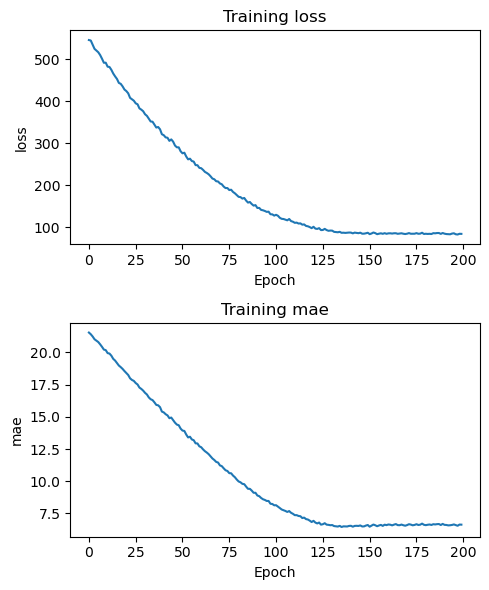

In [99]:
## Plot the training history

history_keys = history.history.keys()

fig, axes = plt.subplots(nrows=len(history_keys), figsize=(5,6))

for i, key in enumerate(history_keys):
    axes[i].plot(history.history[key])
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel(key)
    axes[i].set_title(f'Training {key}')

plt.tight_layout()

We can see above how the loss (MSE), and our additional metric (MAE) change at each epoch.  We see a consistent slope downward until the model levels off at a certain point in the training.  The model has found either a local or global minimum for the loss landscape defined by the loss function and the model architecture.  

**Note** By default Keras models start with randomized weights.  This means that your model's training history may not be exactly the same as this one.  It also means that your model metrics may be somewhat different as well.

We may be able to find a lower minimum, i.e. lower loss, with a larger model, or maybe not.  Remember, all real world data contains irreducible loss and there will be a limit to how well our model can make predictions, no matter how complex we make it.

## Final Model Evaluation

In [100]:
def eval_regression(true, pred, name='model'):
    df = pd.DataFrame(columns=['MSE', 'MAE', 'RMSE'], index=[name])
    df['MAE'] = mean_absolute_error(true, pred)
    df['MSE'] = mean_squared_error(true, pred)
    df['RMSE'] = mean_squared_error(true, pred, squared=False)
    return df

test_scores = eval_regression(y_test, model.predict(X_test_sc), name='Model Test')
train_scores = eval_regression(y_train, model.predict(X_train_sc), name='Model Train')

scores = pd.concat([test_scores, train_scores])
scores

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


,MSE,MAE,RMSE
Model Test,83.05852,6.502083,9.113645
Model Train,83.74678,6.598583,9.151327


Deep learning models can have a tendancy to overfit, especially when they become very large.  However, in this case our model has low variance.  This may indicate we could try a more complex models, either more layers or more nodes, but we will talk about that more in a later lesson.

## Conclusion

In this lesson you learned about how to make a simple regression model in Keras.  You installed TensorFlow and Keras 3, instantiated a `Sequential()` Keras model, and added appropriate `Input()` and `Dense()` layers, including an output layer with one node and no activation function.  Then you compiled the model with an appropriate loss function, MSE, and some additional metrics.  Finally, you fit your model on the training data, visualized the training history, and evaluated it with regression metrics.

# Challenges:

1. Try changing the number of nodes and layers of this model.  Can you create a model with a lower loss?
2. Try increasing the model complexity and/or number of training metrics to see if you can create a model that overfits.
3. Explore the [Keras Documentation](https://keras.io/api/) and see what other optimizers and activation functions are available. If you tune those, can you further improve your model? **Remember not to add any activation function to your final layer!**